## Week 2-2 - Visualizing General Social Survey data

Your mission is to analyze a data set of social attitudes by turning it into vectors, then visualizing the result.

### 1. Choose a topic and get your data

We're going to be working with data from the General Social Survey, which asks Americans thousands of questions ever year, over decades. This is an enormous data set and there have been very many stories written from its data. The first thing you need to do is decide which questions and which years you are going to try to analyze.

Use their [data explorer](https://gssdataexplorer.norc.org/) to see what's available, and ultimately download an Excel file with the data. 

- Click the `Search Varibles` button.
- You will need at least a dozen or two related variables. Try selecting some using their `Filter by Module / Subject` interface.
- When you've made your selection, click the `+ All` button to add all listed variables, then choose `Extract Data` under the `Actions` menu.
- Then you have a multi-step process. Step 1 is just naming your extract
- Step 2: select variables *again!* Click `Add All` in the upper right of the "Variable Cart" in the "Choose Variables" step.
- Step 3: Skip it. You could use this to filter the data in various ways. 
- Step 4: Click `Select certain years` to pick one year of data, then check `Excel Workbook (data + metadata)` as the output format.
- Click `Create Extract` and wait a minute or two on the "Extracts" page until the spinner stops and turns into a download link.

You'll end up with an compressed file in tar.gz format, which you should be able to decompressed by double-clicking on it. Inside is an Excel file. Open it in Excel (or your favorite spreadsheet program) and resave it as a CSV.





In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

In [24]:
# load your data set here
gss = pd.read_csv('GSS.csv', sep=';')
gss.head()

,Marital status,Immigrants improve american society,R experienced sexual harassment,Homosexuals should have right to marry,Have ever legally adopted a child,What is your relationship situation,Has r avoided travel to certain cities,Number of adult owing a gun in household,Should gun control law be stricter after 911,Should background check be required for private gun sale,Think yourself as a feminist?,Should abortion ever be legal,Pregnant as result of rape,Does r smoke,Age of respondent,Sexual orientation
0,Married,Not applicable,Not applicable,Strongly agree,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Yes,Not applicable,47,Not applicable
1,Never married,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,61,Heterosexual or straight
2,Married,Not applicable,Not applicable,Disagree,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Yes,Not applicable,72,Heterosexual or straight
3,Married,Not applicable,Not applicable,Agree,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Yes,Not applicable,43,Not applicable
4,Married,Not applicable,Not applicable,Agree,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Yes,Not applicable,55,Heterosexual or straight


### 3. Turn people  into vectors
I know, it sounds cruel. We're trying to group people, but computers can only group vectors, so there we are. 

Translating the spreadsheet you downloaded from GSS Explorer into vectors is a multistep process. Generally, each row of the spreadsheet is one person, and each column is one qeustion. 

- First, we need to throw away any extra rows and columns: headers, questions with no data, etc.
- Many GSS questions already have numerical answers. These usually don't require any work.
- But you'll need to turn categorical variables into numbers.

Basically, you have to remove or convert every value that isn't a number. Because this is survey data, we can turn most questions into an integer scale. The cleanup might use functions like this:

In [25]:
# drop the last two rows, which are just notes and do not contain data
gss = gss.iloc[0:-2,:]


In [51]:
# Here's a bunch of cleanup code. It probably won't be quite right for your data.
# The goal is to convert all values to small integers, to make them easy to plot with colors below.

# First, replace all of the "Not Applicable" values with None
gss = gss.replace({'Not applicable' : None, 
                   'No answer' : None, 
                   'Don\'t know' : None,
                   'Cant choose': None,
                   'Dont know' : None})

# Manually code likert scales 
gss = gss.replace({'Strongly disagree':-2, 'Disagree':-1, 'Neither agree nor disagree':0, 'Agree':1, 'Strongly agree':2})

# yes/no -> 1/-1
gss = gss.replace({'Yes':1, 'No':-1})

# Some frequency scales should have numeric coding too
gss = gss.replace({'Not at all in the past year' : 0, 
            'Once in the past year' : 1,
            'At least 2 or 3 times in the past year' : 2, 
            'Once a month' : 3,
            'Once a week' : 4,
            'More than once a week':5}) 

gss = gss.replace({ 'Never or almost never' : 0, 
                    'Once in a while' : 1,
                    'Some days' : 2, 
                    'Most days' : 3,
                    'Every day' : 4,
                    'Many times a day' : 5}) 

# Drop some columns that don't contain useful information
#gss = gss.drop(['Respondent id number',
 #               'Ballot used for interview',
  #              'Gss year for this respondent'], axis=1)

# Turn invalid numeric entries into zeros
gss = gss.replace({np.nan:0.0})


gss = gss.replace({'Heterosexual or straight' : 1,
                  'Gay, lesbian, or homosexual': 2,
                  'Bisexual': 3}) 

gss = gss.replace({'89 or older': 89})


gss = gss.replace({'Married': 1,
                  'Never married': 2,
                  'Widowed': 3,
                  'Divorced': 4,
                  'Separated': 5}) 

In [58]:
gss.head(40)

,Marital status,Immigrants improve american society,R experienced sexual harassment,Homosexuals should have right to marry,Have ever legally adopted a child,What is your relationship situation,Has r avoided travel to certain cities,Number of adult owing a gun in household,Should gun control law be stricter after 911,Should background check be required for private gun sale,Think yourself as a feminist?,Should abortion ever be legal,Pregnant as result of rape,Does r smoke,Age of respondent,Sexual orientation
0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61,1.0
2,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,72,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,55,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50,0.0
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,1.0
8,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,45,0.0
9,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,71,1.0


### 4. Plot those vectors!
For this assignment, we'll use the PCA projection algorithm to make 2D (or 3D!) pictures of the set of vectors. Once you have the vectors, it should be easy to make a PCA plot using the steps we followed in class.
    

In [33]:
gss.dtypes

Marital status                                               object
Immigrants improve american society                         float64
R experienced sexual harassment                             float64
Homosexuals should have right to marry                       object
Have ever legally adopted a child                           float64
What is your relationship situation                         float64
Has r avoided travel to certain cities                      float64
Number of adult owing a gun in household                    float64
Should gun control law be stricter after 911                float64
Should background check be required for private gun sale    float64
Think yourself as a feminist?                               float64
Should abortion ever be legal                               float64
Pregnant as result of rape                                  float64
Does r smoke                                                float64
Age of respondent                               

In [52]:
# make a PCA plot here

model = PCA(n_components=2)
out = model.fit_transform(gss)

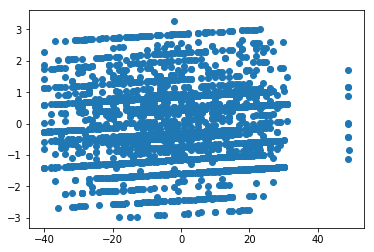

In [53]:
plt.scatter(out[:, 0], out[:, 1])
plt.show()

### 5. Add color to help interpretation
Congratulations, you have a picture of a blob of dots. Hopefully, that blob has some structure representing clusters of similar people. To understand what the plot is telling us, it really helps to take one of the original variables and use it to assign colors to the points. 

So: pick one of the questions that you think will separate people into natural groups. Use it to set the color of the dots in your scatterplot. By repeating this with different questions, or combining questions (like two binary questions giving rise to a four color scheme) you should be able to figure out what the structure of the clusters represents. 


In [54]:
# map integer columns to colors
def col2colors(colvals):
    # gray for zero, then a rainbow.
    # This is set up so yes = 1 = red and no = -1 = indigo
    my_colors = ['gray', 'red','orange','yellow','lightgreen','cyan','blue','indigo']
    
    # We may have integers higher than len(my_colors) or less than zero
    # So use the mod operator (%) to make values "wrap around" when they go off the end of the list
    column_ints = colvals.astype(int) % len(my_colors)
    
    # map each index to the corresponding color
    return column_ints.apply(lambda x: my_colors[x])

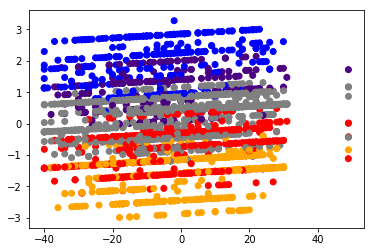

In [56]:
# Make a plot using colors from a particular column

plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss['Homosexuals should have right to marry']))
plt.show()


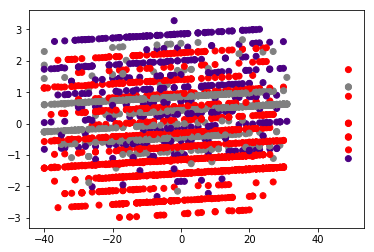

In [57]:
# Make another plot using colors from another column

plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss['Pregnant as result of rape']))
plt.show()


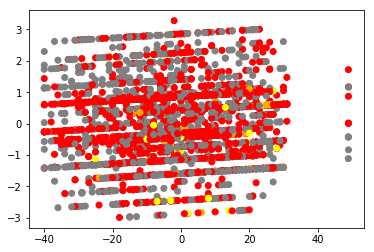

In [59]:
plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss['Sexual orientation']))
plt.show()

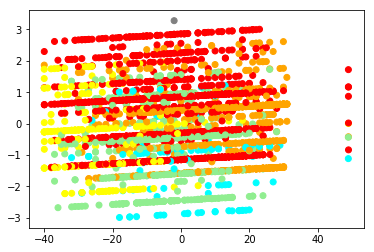

In [60]:
plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss['Marital status']))
plt.show()

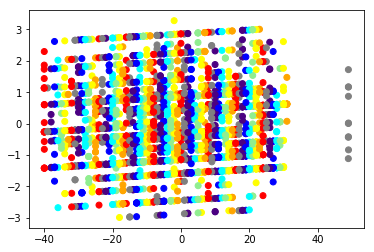

In [62]:
plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss['Age of respondent']))
plt.show()

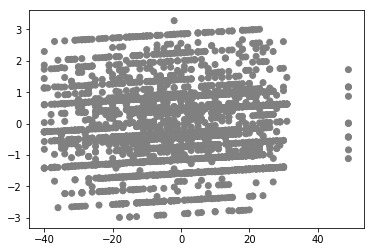

In [64]:
plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss['Should background check be required for private gun sale']))
plt.show()

### 6. Tell us what it means?
What did you learn from this exercise? Did you find the standard left-right divide? Or urban-rural? Early adopters vs. luddites? People with vs. without children? 

What did you learn? What could end up in a story? 
